# Training Models
Two different ways to train linear regression models:
1. Direct "closed form" equation that directly computes the model parameters that best fit the model to the training set (i.e. the model parameters that minimise the cost function over the training set)
2. Use an iterative operation called _gradient descent_ that gradually tweaks the model parameters to minimise the cost function eventually converging to the same set of parameters as the first method.

Polynomial regression is a more complex model that can fit non-linear datasets. Since the model has more parameters than Linear Regression, it is more prone to overfitting the data. To detect whether this is the case, _learning curves_ are used along with _regularisation techniques_ to reduce the risk of overfitting.

Two common models used for classification are: Logistic Regression and Softmax Regression.

### Linear Regression
The first linear regression model of life satisfaction was given by the equation 

$$life\_satisfaction = \theta_{0} + \theta_{1} \times GDP\_per\_capita$$ 

The model is a linear function of the input feature GDP_per_capita. $\theta_{0}$ and $\theta_{1}$ are the model's parameters. The linear model computes a weighted sum of the input features plus a constant called the _bias term_ (or the _intercept term_).

$$\hat{y} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n}$$

Where $\hat{y}$ is the predicted value, n is the number of features, $x_{i}$ is the $i^{th}$ feature value, $\theta_{j}$ is the $j^{th}$ model parameter (including the bias term $\theta_{0}$ and the feature weights $\theta_{1}, \theta_{2}, ..., \theta_{n}$)

The equivalent vectorised form of the above equation is

$$\hat{y} = h_{\theta}(x) = \mathbf{\theta} \bullet \mathbf{x} $$

Where $\theta$ is the model's _parameter vector_, containing the bias term $\theta_{0}$ and the feature weights $\theta_{1}$ to $\theta_{n}$. $\mathbf{x}$ is the instance's _feature vector_ containing $x_{0}$ to $x_{n}$, with $x_{0}$ always equal 1. $\theta \bullet \mathbf{x}$ is the dot product of the vectors $\theta$ and $\mathbf{x}$ which is equal to $\theta_{0}x_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n}$ and $h_{\theta}$ is the _hypothesis function_ using the model parameters, $\theta$.

Note that in machine learning, vectors are usually stored as _column vectors_ so getting the prediction requires $\theta$ to be transposed $\hat{y} = \theta^{T}\mathbf{x}$.

A reminder that linear regression model is evaluated by the Root Mean Square Error and so to train a linear regression model, the model parameters should be computed such that it minimises RMSE. In practice, the MSE is easier to minimise than the RMSE and can lead to the same result (minising the MSE also minimises its square root).

The MSE of a Linear Regression model with hypothesis $h_{\theta}$ on a training set $\mathbf {X}$ is calculated by:
$$ MSE(\mathbf{X}, h_{\theta}) = \frac{1}{m} \sum^{m}_{i=1} (\theta^{T}\mathbf{x}^{i}-y^{i})^2$$

### The Normal Equation
To find the value of $\theta$ that minimises the cost function, the _closed-form solution_ (the mathematical equation that gives the result directly) is called the _Normal Equation_.
$$ \hat{\theta} = (\mathbf{X}^{T} \mathbf{X})^{-1} \mathbf{X}^{T} \mathbf{y} $$
Where $\hat{\theta}$ is the value of $\theta$ that minimises the cost function and $\mathbf{y}$ is the vector of target values containing $y^{1}$ to $y^{m}$.

To generate some linear looking data:

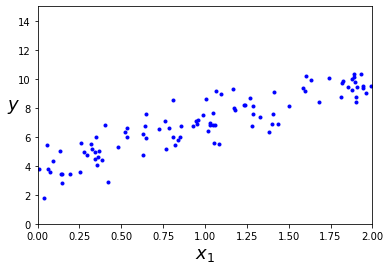

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Compute $\hat{\mathbf{\theta}}$ using the Normal Equation. Use the inv() function from NumPy's linear algebra module to compute the inverse of the matrix and use the dot() method for matrix multiplication:

In [2]:
X_b = np.c_[np.ones((100, 1)), X] #add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.85272306],
       [3.09392767]])

The actual function used to generate noise is $y = 4 + 3x_{1} + $ Gaussian noise. The perfect answer would have been $\theta_{0} = 4$ and $\theta_{1} = 3$ instead of $\theta_{0} = 3.805$ and $\theta_{1} = 3.405$ but the noise made it impossible to recover the original function.

To make a prediction using the value of $\hat{\theta}$:

In [3]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] #add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.85272306],
       [10.0405784 ]])

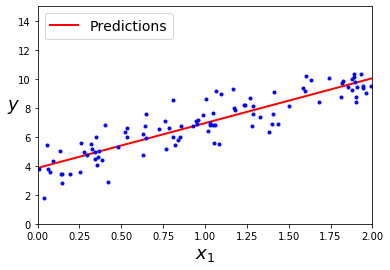

In [4]:
#Plot the model's predictions
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [5]:
#Performing linear regression using Scikit-Learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.85272306]), array([[3.09392767]]))

In [6]:
lin_reg.predict(X_new)

array([[ 3.85272306],
       [10.0405784 ]])

The LinearRegression class is based on the scipy.linalg.lstsq() function which can be called directly

In [7]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.85272306],
       [3.09392767]])

The function computes $\hat{\theta} = \mathbf{X}^{+}\mathbf{y}$, where $\mathbf{X}^+$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse) which can be computed using np.linalg.pinv()

In [8]:
np.linalg.pinv(X_b).dot(y)

array([[3.85272306],
       [3.09392767]])

The pseudoinverse is computed using standard matrix factorisation technique called _Singular Value Decomposition_ (SVD) that can decompose the training set matrix $\mathbf{X}$ into the matrix multiplication of three matrices $\mathbf{U, \Sigma, V^T}$. The pseudoinverse is $\mathbf{X^+=V\Sigma^+ U^T}$. 

To compute the matrix $\Sigma^+$, the algorithm takes $\Sigma$ and sets to zero all values smaller than a tiny threshold value, then it replaces all the non-zero values with their inverse and finally transposes the resulting matrix. This approach is more efficient than computing the Normal Equation and handles edge cases nicely. The normal equation might not work if the matrix $\mathbf{X^T X}$ is not invertible (i.e. singular) such as if $m < n$ or if some features are redundant, but the pseudoinverse is always defined.

### Computational Complexity
The Normal Equation computes the inverse of $\mathbf{X^T X}$ which is an $(n+1) \times (n+1)$ matrix (where n is the number of features). The _computational complexity_ of inverting such a matrix is typically about $O(n^{2.4})$ to $O(n^3)$ depending on the implementation, i.e. if the features are doubled then the computational time increases by $2^3.4 = 5.3$ to $2^3 = 8$ times.

The SVD approach used by Scikit-Learn's LinearRegression class is about $O(n^2)$. 

Both the SVD and Normal Equation approach are very slow when the number of features is large (~100,000).

However, once the Linear Regression model is trained (using Normal Equation or other algorithms), predictions are very fast; the computational complexity is linear with respect to both the number of instances you want to make predictions on and the number of features. In other words, making predictions on twice as many instances (or twice as many features) takes about twice as much time.

### Gradient Descent
_Gradient Descent_ is a generic optimisation algorithm capable of finding optimal solutions to a range of problems. It works by tweaking the parameters iteratively to minimise a cost function and is suitable for larger datasets.

Gradient descent measures the local gradient of the error function with respect to the parameter vector $\mathbf{\theta}$ and it goes in the direction of descending gradient. Once the gradient reaches 0, it is at a minimum.

The initial $\mathbf{\theta}$ is filled with random values known as _random initialisation_ and then the model is improved gradually by taking small steps at a time trying to decrease the cost function (e.g. the MSE) until the algorithm converged at a minimum.

<img src="Figure%204-3.PNG" alt="Drawing" style="width: 600px;"/>

An important parameter in gradient descent is the size of the steps, determined by the _learning rate_ hyperparameter. If the learning rate is too small, the algorithm will have to go through many steps to converge which takes a long time.

<img src="Figure%204-4.PNG" alt="Drawing" style="width: 600px;"/>

Alternatively, if the learning rate is too large, the algorithm might climb to larger and larger values and diverge without finding a good solution.

<img src="Figure%204-5.PNG" alt="Drawing" style="width: 600px;"/>

Finally, the terrain of the cost function is not always a bowl. There might be holes, ridges or plateaus making convergence at the minimum difficult. Figure 4.6 illustrates common problems with gradient descent: if the random initialisation starts the algorithm on the left, the algorithm will converge at a _local minimum_ which is not as optimal as the _global minimum_. If it initialises on the right, it has to cross a plateau which if the algorithm stops too early, it will never converge at the global minimum.

<img src="Figure%204-6.PNG" alt="Drawing" style="width: 600px;"/>

Fortunately, the MSE cost function for a Linear Regression model is a *convex function*, i.e. any line segment drawn between two points chosen on the curve never crosses the curve. This means that the function has no local minima just one global minimum. It is also a continuous function with a slope that never changes abruptly (the derivative is *Lipschitz continuous*). This implication is that gradient descent is guaranteed to converge close to the global minimum given enough time and a sufficiently high learning rate.

The cost function has the shape of a bowl but can be elongated if features have vastly different scales. Figure 4.7 shows gradient descent on a training set where features 1 and 2 have the same scale (left) compared to when the training set has a feature 1 has much smaller values than feature 2 (right).

<img src="Figure%204-7.PNG" alt="Drawing" style="width: 800px;"/>

On the left, the gradient descent algorithm goes straight towards the minimum, thereby reaching it quickly, On the right, the first direction goes almost orthogonal to the direction of the global minimum then approaches down a flat valley eventually to a minimum which can take a long time. Therefore, when using gradient descent the features should have a similar scale to avoid this problem.

The algorithm searches in the model's _parameter space_ so the more parameters the model has, the more dimensions the algorithm has to explroe before reaching the global minimum.

### Batch Gradient Descent

To implement gradient descent, compute the gradient of the cost function with respect to each model parameter $\theta_{j}$. The partial derivative of the cost function with respect to the parameter $\theta_{j}$, $\frac{\partial}{\partial \theta_{j}}MSE(\theta)$
$$\frac{\partial}{\partial \theta_{j}}MSE(\theta) = \frac{2}{m}\sum^m_{i=1} (\theta ^T \mathbf{x}^i - y^i)x_j^i$$

Instead of computing the partial derivatives individually, the gradient vector of the cost function can compute all the partial derivatives in one equation. The gradient of the vector, $\nabla_{\theta}MSE(\mathbf{\theta})$, contains all the partial derivatives of the cost function (one for each model parameter).

<img src="Equation%204.6.PNG" alt="Drawing" style="width: 300px;"/>

The equation shows that the formula performs calculations over the full training set, __X__, at each gradient descent step, but scales well with the number of features. Therefore, implementing gradient descent on a large training set is slow but tends to perform well with large number of features.

Once the gradient vector that goes uphill is found, go in the opposite direction to go downhill, i.e. subtract by $\nabla_\theta MSE(\mathbf{\theta})$ from $\mathbf{\theta}$. This is where the _learning rate_, $\eta$, is introduced to multiply the gradient vector by to determine the size of the downhill step.

$$\mathbf{\theta}^{(next \space step)} = \mathbf{\theta} - \eta \nabla_\theta MSE(\theta)$$

To implement the algorithm:

In [9]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) #random initialisation

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[3.85272306],
       [3.09392767]])

<img src="Figure%204-8.PNG" alt="Drawing" style="width: 500px;"/>

The left case illustrates when the learning rate is too low and the algorithm takes a long time to converge to the global minimum. The middle case is a good learning rate, where convergence happens after a few iterations. The case on the right is when the learning rate is too high and the algorithm diverges and never reaches the minimum.

To find a good learning rate, grid search can be used. However, the number of iterations in the grid search should be limited to stop the grid search if the learning rate causes divergence.

The number of iterations set to run the algorithm should interrupt the algorithm when the gradient vector becomes tiny - that is when the norm becomes smaller than a tiny number, $\varepsilon$ called the _tolerance_, because this is the point when the Gradient Descent has (almost) reached the minimum.

### Convergence Rate

As the cost function is convex and its slope does not change abruptly (for MSE cost function), Batch Gradient Descent with a fixed learning rate will eventually converge to the optimal solution, but it could take a long time to compute: it can take $O(1/\varepsilon)$ iterations to reach the optimal solution. If the tolerance is divided by 10, the algorithm will take 10 times as long to run.

### Stochastic Gradient Descent
The main problem is that Batch Gradient Descent uses the whole training set to compute the gradients at every step and so becomes slow with large training sets. The opposite extreme is _Stochastic Gradient Descent_ picks a random instance in the training set at every step and computes the gradients based on that single instance. SGD can be implemented as an out of core algorithm as only a single instance has to be in memory at a time. This also means that SGD is much faster as there is very little data being manipulated for each iteration.

However, the stochastic (random) nature of the algorithm makes is less regular than Batch Gradient Descent: instead of gently decreasing the gradient until a minimum is reached, the function will oscillate and only decreasing the gradient on average. Over time it will still end up very close to the minimum but will continue to oscillate even at the minimum so the algorithm stops at a good parameter value but not the optimal one.

<img src="Figure%204-9.PNG" alt="Drawing" style="width: 600px;"/>

For cost functions with irregular terrains like the one in Figure 4-6, the algorithm can jump out of local minima towards the global minimum due to its random nature which cannot be done for Batch Gradient Descent.

Randomness can be used to escape local optima but is bad because the algorithm never setttles at the minimum. The solution is to gradually decrease the learning rate. Start with a large learning rate to make quick progress and escape local minima but tune it to go smaller and smaller to allow the algorithm to settle near the global minimum. The process is known as _stimulated annealing_. The function determines the learning rate at each iteration called the _learning schedule_. If the learning rate is reduced too quickly, the algorithm can still get trapped at a local minima but if the learning rate is reduced too slow, the computational time will be long.

The following example implements SGD using a simple learning schedule:

In [11]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2, 1) # random initialisation

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[3.85596386],
       [3.03597422]])

By convention, the algorithm iterates by rounds of m iterations; each round is called an _epoch_. While Batch Gradient Descent iterated 1000 times through the whole training set, this code goes through the training set 50 times to reach a good solution.